# Importar biblioteca

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from textblob import TextBlob
from nltk.tokenize import word_tokenize

# download de stopwords de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Organizar DataFrame

In [2]:
df1 = pd.read_excel('WheyWords.xlsx')
df1 = df1.rename(columns={'Title': 'Reviews'})
df1 = df1.dropna(subset='Reviews').reset_index(drop=True)
df1.to_csv('WheyWords_Reedit.csv')

# Análise de sentimento

In [3]:
df_reddit = pd.read_csv('WheyWords_Reedit.csv',usecols=['Reviews'])
df_reddit = pd.DataFrame(df_reddit)
df_reddit

,Reviews
0,Discover Food that Contains Iron- 10 Delicious...
1,Is Women’s Best protein and supplements actual...
2,Unflavored protein powder / isolate?
3,When to intake protein for weight loss
4,Optimum Nutrition best flavors?
...,...
940,Too much sodium in my protein?
941,What is going on with P28 bread?!?!?!
942,I'm 15 60kg 5'8
943,Which one is the best protein Powder in 2020?


In [4]:
# Aplicação de técnicas de análise de sentimento 
df_reddit['Sentiment'] = df_reddit['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
df_reddit[['polaridade_num', 'polaridade_texto']] = df_reddit['Sentiment'].apply(polaridade).apply(pd.Series)
df_reddit

,Reviews,Sentiment,polaridade_num,polaridade_texto
0,Discover Food that Contains Iron- 10 Delicious...,1.00,1,Positivo
1,Is Women’s Best protein and supplements actual...,0.85,1,Positivo
2,Unflavored protein powder / isolate?,0.00,0,Neutro
3,When to intake protein for weight loss,0.00,0,Neutro
4,Optimum Nutrition best flavors?,0.85,1,Positivo
...,...,...,...,...
940,Too much sodium in my protein?,0.20,1,Positivo
941,What is going on with P28 bread?!?!?!,0.00,0,Neutro
942,I'm 15 60kg 5'8,0.00,0,Neutro
943,Which one is the best protein Powder in 2020?,1.00,1,Positivo


In [6]:
df_reddit.to_csv('df_reddit_sentiment.csv')

## Contagem de polaridade

In [7]:
df1= pd.read_csv('df_reddit_sentiment.csv')
df1

,Unnamed: 0,Reviews,Sentiment,polaridade_num,polaridade_texto
0,0,Discover Food that Contains Iron- 10 Delicious...,1.00,1,Positivo
1,1,Is Women’s Best protein and supplements actual...,0.85,1,Positivo
2,2,Unflavored protein powder / isolate?,0.00,0,Neutro
3,3,When to intake protein for weight loss,0.00,0,Neutro
4,4,Optimum Nutrition best flavors?,0.85,1,Positivo
...,...,...,...,...,...
940,940,Too much sodium in my protein?,0.20,1,Positivo
941,941,What is going on with P28 bread?!?!?!,0.00,0,Neutro
942,942,I'm 15 60kg 5'8,0.00,0,Neutro
943,943,Which one is the best protein Powder in 2020?,1.00,1,Positivo


In [8]:
positive_reddit = df1[df1['polaridade_texto'] == 'Positivo'].shape[0]
negative_reddit = df1[df1['polaridade_texto'] == 'Negativo'].shape[0]
neutral_reddit = df1[df1['polaridade_texto'] == 'Neutro'].shape[0]

print("Quantidade de sentimento positivo:", positive_reddit)
print("Quantidade de sentimento negativo:", negative_reddit)
print("Quantidade de sentimento neutro:", neutral_reddit)

Quantidade de sentimento positivo: 351
Quantidade de sentimento negativo: 88
Quantidade de sentimento neutro: 506


# Frequencia de palavras
**DESAFIO**
palavras/termos com alta frequência, mas em um contexto negativo para o público-alvo

In [9]:
df_neg = df1.loc[(df1['polaridade_texto']=='Negativo')]
df_neg

,Unnamed: 0,Reviews,Sentiment,polaridade_num,polaridade_texto
11,11,doesn't anyone make just plain whey protein wi...,-0.214286,-1,Negativo
12,12,Why was this shake so awful?,-1.000000,-1,Negativo
35,35,Recommendation of an additive-free / low-addit...,-0.062500,-1,Negativo
36,36,I'm tired of lumpy shakes.,-0.400000,-1,Negativo
40,40,I'm confused on the size of the scoop of my pr...,-0.400000,-1,Negativo
...,...,...,...,...,...
900,900,Protein heavy meals?,-0.200000,-1,Negativo
915,915,I got a question. I’m buying the Gatorade Prot...,-0.093750,-1,Negativo
920,920,I’ve been using Premier Protein as a supplemen...,-0.233333,-1,Negativo
937,937,Odd question alert - Whey powder and porridge/...,-0.166667,-1,Negativo


In [10]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Adiciona stop words adicionais
additional_stop_words = ["'s", "oh", "https","’","''","“","...","”","``","1","2"]
stop_words_en.update(additional_stop_words)

# Carregar stopword em português
stop_words_pt = set(stopwords.words('portuguese'))

In [11]:
# Junte todas as reviews em um único texto
reddit_text = ' '.join(df_neg['Reviews'].astype(str))

# Tokenize o texto em palavras
tokens = word_tokenize(reddit_text)

# Filtra as palavras para remover stopwords e pontuações
reddit_words = [word.lower() for word in tokens if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]

# Conta a frequência das palavras
reddit_word_freq = Counter(reddit_words)

In [12]:
df_wordfreq_reddit = pd.DataFrame.from_dict(reddit_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_reddit.columns = ['Palavra', 'Frequência']
display(df_wordfreq_reddit)

,Palavra,Frequência
0,n't,4
1,anyone,5
2,make,4
3,plain,1
4,whey,11
...,...,...
371,look,1
372,strange,1
373,gon,1
374,die,1


In [13]:
df_wordfreq_reddit_top = df_wordfreq_reddit.sort_values(by=['Frequência']).tail(20)
display(df_wordfreq_reddit_top)
df_wordfreq_reddit.to_csv('df_wordfreqNEGATIVE_reddit.csv')

,Palavra,Frequência
2,make,4
72,intake,4
0,n't,4
40,muscle,4
144,im,4
69,days,4
47,tried,4
1,anyone,5
156,bars,5
31,creatine,5


### Nuvem de palavras

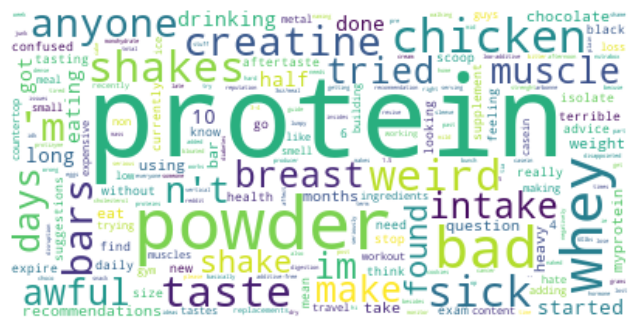

In [14]:
word_freq_dict = df_wordfreq_reddit_top.set_index('Palavra')['Frequência'].to_dict()

wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

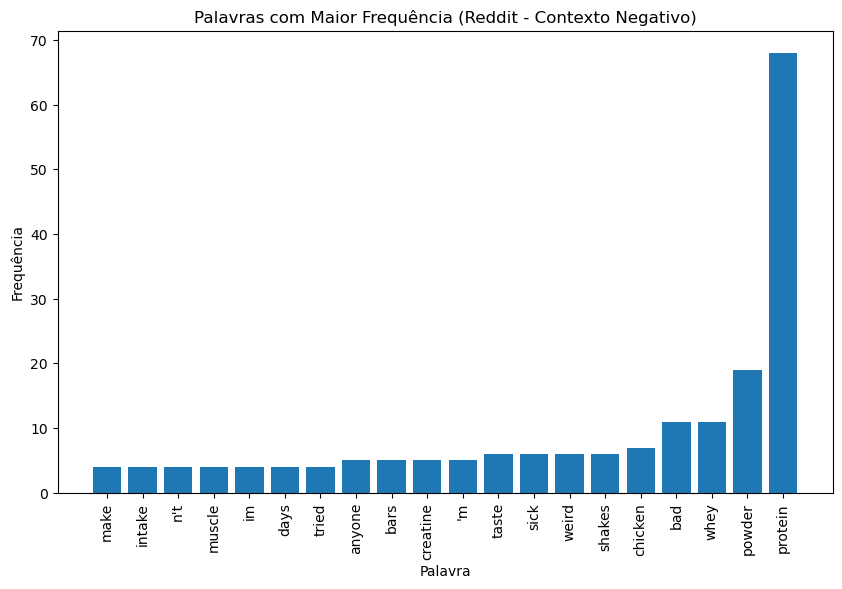

In [15]:
import matplotlib.pyplot as plt

# Definir os dados para o gráfico
palavras = df_wordfreq_reddit_top['Palavra']
frequencias = df_wordfreq_reddit_top['Frequência']

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, frequencias)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Palavras com Maior Frequência (Reddit - Contexto Negativo)')

# Exibir o gráfico
plt.show()

# Comparação
Obtendo as 20 palavras negativas mais frequentes e calculando a proporção de ocorrência nas avaliações gerais

In [16]:
# Frequência geral de todas as palavras
geral_text = ' '.join(df1['Reviews'].astype(str))
geral_words = nltk.word_tokenize(geral_text.lower())
geral_words = [word.lower() for word in tokens if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]
geral_word_freq = Counter(geral_words)

In [19]:
# Comparação das frequências
frequencia_relativa = {}
for palavra, frequencia in reddit_word_freq.items():
    frequencia_relativa[palavra] = frequencia / geral_word_freq[palavra]

# Ordenar as palavras por frequência relativa
palavras_negativas_comuns = sorted(frequencia_relativa, key=frequencia_relativa.get, reverse=True)

# Exemplo de exibição das palavras negativas mais comuns em relação ao geral
for palavra in palavras_negativas_comuns[:20]:
    print(palavra)

n't
anyone
make
plain
whey
protein
without
bunch
junk
added
shake
awful
recommendation
additive-free
low-additive
producer
naked
'm
tired
lumpy


# Conclusão
Após analisar as palavras fornecidas, podemos categorizá-las da seguinte forma:

1. Palavras neutras: whey, protein, shake, recommendation, producer, tired. Essas palavras estão relacionadas a produtos, recomendações e sensações físicas, mas não possuem uma conotação negativa ou positiva clara. Portanto, elas podem ser consideradas neutras em termos de polaridade.

2. Palavras negativas: awful, lumpy. Essas palavras têm uma conotação negativa evidente e indicam algo de qualidade ruim, textura indesejada ou experiência negativa. Elas refletem uma polaridade negativa em relação aos produtos ou experiências associados.

3. Palavras relacionadas a restrições ou preferências: n't, anyone, make, plain, without, bunch, junk, added, additive-free, low-additive, naked. Essas palavras estão relacionadas a restrições alimentares, preferências por produtos sem aditivos, naturais ou com baixo teor de aditivos. Elas não possuem uma polaridade clara, mas indicam preferências pessoais ou escolhas específicas em relação aos produtos.